In [133]:
new_data <- read.csv(file = "downloads/jake_data_proximity_analysis.csv")
new_data$Site<-NULL
new_data$Date....as.Date.character....format.....Y..m..d..<-NULL
new_data$Time....character..<-NULL
new_data$proximity_percentage<-NULL
new_data[,-9] <- scale(new_data[,-9])
new_data$hypothetical_cluster<- as.factor(as.numeric(new_data$hypothetical_cluster))
names(new_data)[7] <- "nrows....integer.."
head(new_data)

,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..,hypothetical_cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.03739256,0.4914947,-1.3783403,-0.221218831,-1.0489085,-0.2522929,-0.3889824,0.01150327,9
2,0.02435816,0.6322092,-2.3649393,-0.904553006,-0.9794271,-0.1515380,-0.3889824,0.14803488,9
3,-0.03188083,0.9421197,-1.7675389,-0.866686132,-1.1038714,-0.5436540,-0.3889824,-0.53824260,9
4,0.08385346,0.7232758,-1.6559800,-0.006147892,-0.9951104,-0.3994346,-0.3889824,-0.34232051,9
5,-0.26395988,1.6532576,-3.5128102,-1.439463097,-1.1344090,-0.3158087,-0.3889824,-0.21878164,9
6,-0.16282745,-0.3758349,0.1331966,-0.177260449,-0.9988549,-0.3643071,-0.3889824,-0.41511651,3


In [8]:
install.packages("readr")


Installing package into 'C:/Users/cflow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'magrittr', 'pkgconfig', 'Rcpp', 'tibble', 'hms', 'R6', 'clipr', 'BH'




package 'magrittr' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'clipr' successfully unpacked and MD5 sums checked
package 'BH' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cflow\AppData\Local\Temp\RtmpsJeFSz\downloaded_packages


Warning message:
"package 'readr' was built under R version 3.6.3"


In [73]:
library(readr)

In [94]:
urlfile="https://raw.githubusercontent.com/UMI-iGlobes/soundscapes/master/indices_with_clusters.csv"
original_data<-read_csv(url(urlfile))
original_data$acoustic_evenness....double..<-NULL
original_data$spectral_entropy....double..<-NULL
original_data$cluster..fifteen..clusters<-NULL
original_data$Site<-NULL
original_data$Date....as.Date.character....format.....Y..m..d..<-NULL
original_data$Time....character..<-NULL
original_data$File_Start_Time....character..<-NULL
original_data$File_End_Time....character..<-NULL
original_data$Name....character..<-NULL
original_data[,-9]<- scale(original_data[,-9])
original_data$cluster..nine..clusters<- as.factor(as.numeric(original_data$cluster..nine..clusters))
head(original_data)

Parsed with column specification:
cols(
  Site = col_character(),
  Date....as.Date.character....format.....Y..m..d.. = col_date(format = ""),
  Time....character.. = col_character(),
  Name....character.. = col_character(),
  File_Start_Time....character.. = col_double(),
  File_End_Time....character.. = col_double(),
  bioacoustic....double.. = col_double(),
  amplitude....double.. = col_double(),
  temporal_entropy....double.. = col_double(),
  spectral_entropy....double.. = col_double(),
  acoustic_entropy....double.. = col_double(),
  acoustic_diversity....double.. = col_double(),
  acoustic_evenness....double.. = col_double(),
  acoustic_complexity....double.. = col_double(),
  nrows....integer.. = col_double(),
  ndsi....double.. = col_double(),
  cluster..nine..clusters = col_double(),
  cluster..fifteen..clusters = col_double()
)



bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..,cluster..nine..clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.15128774,0.05357391,-1.02517852,1.657195,1.725522,2.431469,0.7502799,0.3758906,4
-0.58359367,0.22106740,-0.97234193,1.619785,1.657601,2.757101,-0.3177701,0.9984916,4
-0.04681131,1.22597713,-0.08918344,1.579793,1.622160,2.445764,-0.3177701,0.5591209,4
0.97787851,0.75623775,0.18785748,1.469510,1.660114,3.546632,-0.3177701,0.9850234,4
-0.25463050,0.96572811,-0.02815722,1.601009,1.606197,2.642051,0.7502799,0.4885602,4
1.11485166,0.05861859,-0.19222905,1.608395,1.370288,2.052151,-0.3177701,0.7700507,1


In [95]:
set.seed(17)
data_set_size <- floor(nrow(original_data)/10)
indexes <- sample(1:nrow(original_data), size = data_set_size)
training <- original_data[-indexes,]
validation <- original_data[indexes,]

In [137]:
install.packages("randomForest")
library(randomForest)
library(caret)

Warning message in install.packages("randomForest", "caret"):
"'lib = "caret"' is not writable"


ERROR: Error in install.packages("randomForest", "caret"): unable to install packages


In [97]:
rf_classifier = randomForest(cluster..nine..clusters ~ ., data=training, ntree=100, mtry=2, importance=TRUE)

In [101]:
rf_classifier


Call:
 randomForest(formula = cluster..nine..clusters ~ ., data = training,      ntree = 100, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.22%
Confusion matrix:
     1   2    3   4    5    6   7   8    9 class.error
1 1290   0   25  16   17    4   0   1   20  0.06045157
2    0 179    1   0    0    0   2   0    0  0.01648352
3   15   0 2991   1   25   17   0   1   49  0.03484995
4   18   1    1 757    1    0   3   0    7  0.03934010
5   32   0   25   4 2021    4  17   0   11  0.04399243
6    3   0   35   0    3 1310   1   0   18  0.04379562
7    1   1    5  16   34    2 806   1    8  0.07780320
8    0   0    1   2    0    0   1 243    5  0.03571429
9   11   0   37   4    4   13   9   2 2552  0.03039514

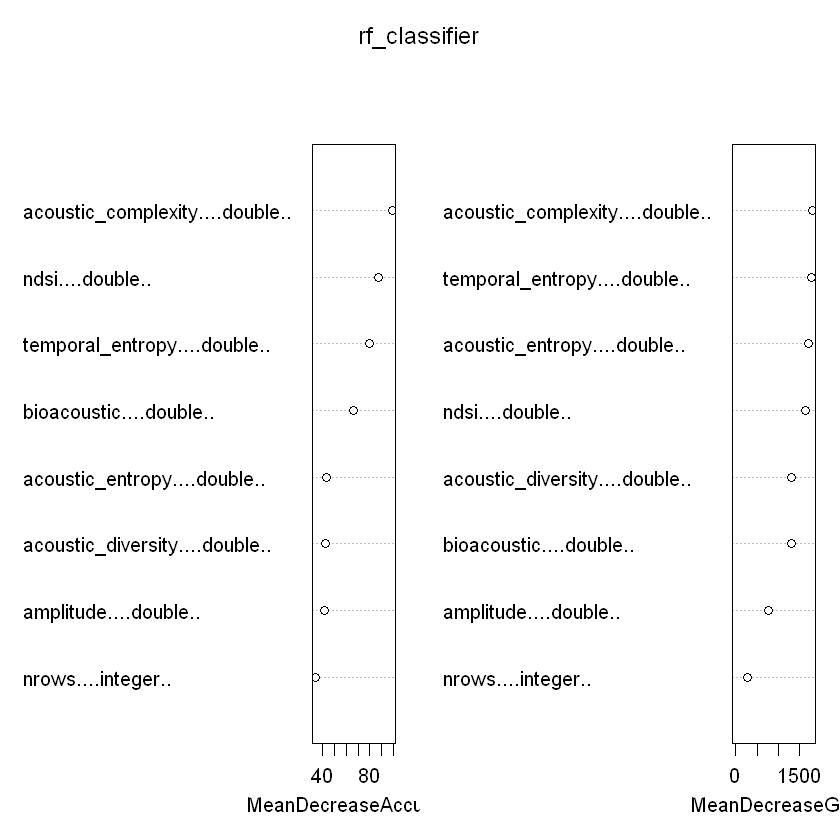

In [104]:
varImpPlot(rf_classifier)

In [107]:
prediction_for_table <- predict(rf_classifier,validation[,-9])
table(observed=validation$cluster..nine..clusters,predicted=prediction_for_table)

        predicted
observed   1   2   3   4   5   6   7   8   9
       1 161   0   2   3   3   0   0   0   1
       2   0  16   0   0   0   0   0   0   0
       3   2   0 311   0   4   1   0   0   8
       4   1   2   1  79   0   0   0   0   0
       5   1   0   3   1 214   1   2   0   0
       6   1   0   2   0   1 151   0   0   2
       7   0   0   0   2   3   0 109   0   0
       8   0   0   0   0   0   0   0  16   1
       9   4   0   5   0   1   0   0   0 294

In [141]:
install.packages("caret")
library(caret)


Installing package into 'C:/Users/cflow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'caret' is in use and will not be installed"


In [145]:
prediction_for_table <- predict(rf_classifier,new_data[,-9])
confusionMatrix(prediction_for_table,new_data[,9])

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 184   0   3  10  17   0   0   1   1
         2   0   1   0   0   0   0   0   0   0
         3   1   0 178   0   8  21   0   0   7
         4  14   1   0  36   2   0   0   0   0
         5   0   0   5   0  49   0   0   0   2
         6   0   0   3   0   1 282   0   0   1
         7   0   0   0   0   1   0   0   0   0
         8   0   0   0   0   0   0   0   2   4
         9   1   0   1   1   0   0   1   1 172

Overall Statistics
                                          
               Accuracy : 0.8933          
                 95% CI : (0.8726, 0.9116)
    No Information Rate : 0.2994          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8656          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1  Class: 2 Class: 

In [144]:
install.packages("e1071")

Installing package into 'C:/Users/cflow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cflow\AppData\Local\Temp\RtmpsJeFSz\downloaded_packages
